In [2]:
import pandas as pd
import json
import os

## Obtendo a lista de repositorios

In [3]:
folder_path = './runs/csv/'

items_list = os.listdir(folder_path)

directories = [item for item in items_list if os.path.isdir(os.path.join(folder_path, item))]
directories

['2023_09_10_21_28_ddqn_trader',
 '2023_09_11_00_02_ddqn_trader',
 '2023_09_20_21_09_ddqn_trader',
 '2023_09_10_22_46_ddqn_trader',
 '2023_09_11_01_03_ddqn_trader',
 '2023_09_11_00_44_ddqn_trader',
 '2023_09_11_00_41_ddqn_trader',
 '2023_09_10_23_23_ddqn_trader',
 '2023_09_10_23_24_ddqn_trader',
 '2023_09_20_21_10_ddqn_trader',
 '2023_09_10_22_06_ddqn_trader',
 '2023_09_11_00_43_ddqn_trader']

## Obtendo arquivos a lista de arquivos em um repositorio

In [4]:
directories_dict = []
directory_dict = {}

for directory in directories:
    files_inside_directory = os.listdir(f"{folder_path}{directory}")
    files = [file for file in files_inside_directory if file.endswith('.csv')]
    files.sort()

    directory_dict = {
        'path': f"{folder_path}{directory}",
        'files': files
    }
    directories_dict.append(directory_dict)
directories_dict

[{'path': './runs/csv/2023_09_10_21_28_ddqn_trader',
  'files': ['run-2023_09_10_21_28_ddqn_trader-tag-data___.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_agent_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_average_net_worth.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_avg_twap.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_ddql_loss_per_replay.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_diff_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_episode_orders.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_information_ratio.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_market_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_rewards.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_time_to_process.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_win_rate.csv']},
 {'path': './runs/csv/2023_09_11_00_02_ddqn_trader',
  'files': ['run-2023_09_11_00_02_ddqn_trader-tag-data___.csv',
   'run-2023_09_11_00_02_ddqn_trader

## Obtendo os dataframes e métricas

In [5]:
translate_dict = {
    'Step': 'Passo',
    'agent_returns': 'Retorno do agente',
    'average_net_worth': 'Patrimônio líquido médio',
    'avg_twap': 'TWAP médio',
    'diff_returns': 'Diferença de retorno', 
    'episode_orders': 'Pedidos por episódio',
    'information_ratio': 'Razão de informação',
    'market_returns': 'Retorno do mercado', 
    'rewards': 'Recompensas', 
    'time_to_process': 'Tempo de processamento',
    'win_rate': 'Taxa de sucesso'
}
translate_fn = lambda x: translate_dict.get(x) if  translate_dict.get(x, None) else x

for index, _ in enumerate(directories_dict):
    path = directories_dict[index].get('path')
    files = directories_dict[index].get('files')
    columns = [file.split('tag-data_')[1].split('.csv')[0] for file in files if 'tag-data_' in file]
    with open( f"{path}/parameters.json", 'r') as json_file:
        json_data = json.load(json_file)
    
    for _, file in enumerate(files):
        current_path = f"{path}/{file}"
        dict_to_rename_column = {
            'Wall time': 'Wall time',
            'Step': 'Step',
            'Value': columns[_]
        }
        # print(dict_to_rename_column)
        if _ == 0:
            df = pd.read_csv(current_path)
            df = df.rename(columns=dict_to_rename_column)
            df = df.drop("Wall time", axis=1)
        else:
            df_aux = pd.read_csv(current_path)
            df_aux = df_aux.rename(columns=dict_to_rename_column)
            df_aux = df_aux.drop("Wall time", axis=1)

            # , names=['Wall time', 'Step', columns[_]])
            df = pd.merge(df, df_aux, on=['Step'], how='left')

    directories_dict[index]['stock_name'] = json_data.get("stock_name")
    directories_dict[index]['processing_device'] = json_data.get("processing_device")
    directories_dict[index]['network_architecture'] = json_data.get("network_architecture")
    directories_dict[index]['period_type'] = json_data.get("period_type")
    directories_dict[index]['dataframe'] = df

directories_dict

[{'path': './runs/csv/2023_09_10_21_28_ddqn_trader',
  'files': ['run-2023_09_10_21_28_ddqn_trader-tag-data___.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_agent_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_average_net_worth.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_avg_twap.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_ddql_loss_per_replay.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_diff_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_episode_orders.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_information_ratio.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_market_returns.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_rewards.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_time_to_process.csv',
   'run-2023_09_10_21_28_ddqn_trader-tag-data_win_rate.csv'],
  'stock_name': 'BTCUSD_1h',
  'processing_device': 'CPU',
  'network_architecture': 'input: 16 - internals: (128, 128) - output: [0 1 2]',
  'period_type

## Gerando graficos

In [6]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import re

In [7]:
directories_dict[0].get('dataframe').columns

Index(['Step', '__', 'agent_returns', 'average_net_worth', 'avg_twap',
       'ddql_loss_per_replay', 'diff_returns', 'episode_orders',
       'information_ratio', 'market_returns', 'rewards', 'time_to_process',
       'win_rate'],
      dtype='object')

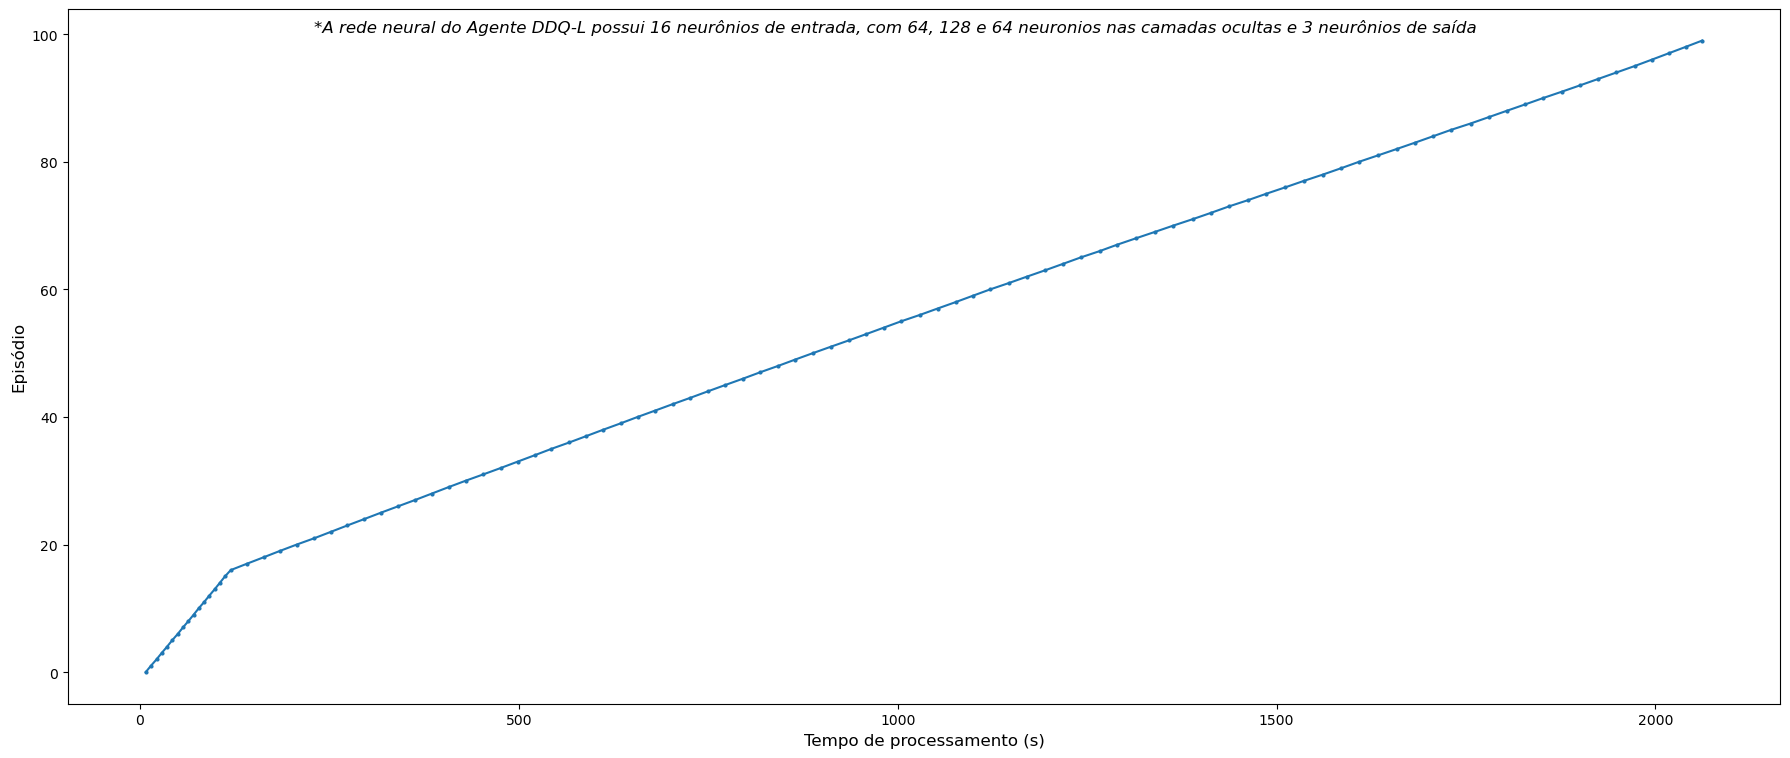

In [8]:
def plot_data(directories_dict, axis, axis_label='', title=''):
    def get_network_architecture(input_text):
        input = re.search(r'input: (\d+)', input_text).group(1)

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')
        hidden_layers = ", ".join(map(str, hidden_layers[:-1])) + " e " + str(hidden_layers[-1])

        output = re.search(r'output: \[(.*?)\]', input_text).group(1)
        output = len([int(numero) for numero in output.split()])

        output_text = f'*A rede neural do Agente DDQ-L possui {input} neurônios de entrada, com {hidden_layers} neuronios nas camadas ocultas e {output} neurônios de saída'

        return output_text
    
    def translate_fn(key, type='title'):
        translate_dict = {
            'Step': 'Episódio',
            'agent_returns': 'Retorno do agente',
            'average_net_worth': {'title': 'Patrimônio líquido médio', 'label': 'Patrimônio líquido médio (USD)'},
            'avg_twap': 'TWAP médio',
            'diff_returns': 'Diferença de retorno', 
            'episode_orders': 'Pedidos por episódio',
            'information_ratio': 'Razão de informação',
            'market_returns': 'Retorno do mercado', 
            'rewards': 'Recompensas', 
            'time_to_process': {'title': 'Tempo de processamento', 'label': 'Tempo de processamento (s)'},
            'win_rate': 'Taxa de sucesso'
        }

        if isinstance(translate_dict.get(key), dict):
            if type == 'title':
                return translate_dict.get(key).get('title')
            elif type == 'label':
                return translate_dict.get(key).get('label')
            else:
                raise Exception('Type not found')
        elif translate_dict.get(x, None):
            return translate_dict.get(key)
        else:
            return x

    x, y = axis
    x_label, y_label = axis_label if isinstance(axis_label, tuple) else axis
    fig = plt.figure(figsize=(18,8))

    df = directories_dict.get('dataframe')
    plt.plot(df[x], df[y], marker='o',linestyle='-', markersize=2)
    title = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'} ({directories_dict.get('processing_device')})"
    # ax = plt.title(title, fontsize=22)

    ax = plt.suptitle(get_network_architecture(directories_dict.get("network_architecture")), fontsize=12, style='italic' , y=0.93)

    ax=plt.xlabel(translate_fn(x_label, 'label') , fontsize=12)
    ax=plt.ylabel(translate_fn(y_label, 'label') , fontsize=12)
    ax=plt.gca()
    fig.tight_layout()
    plt.show()

plot_data(directories_dict[1], axis=('time_to_process', 'Step'), title='Close')

Tempo de processamento por Episódio para o Bitcoin (CPU) - 128_128 - 100 -> 1976.44 s ou 32.94 min
Tempo de processamento por Episódio para o Bitcoin (GPU) - 64_128_64 - 100 -> 2061.60 s ou 34.36 min
Tempo de processamento por Episódio para o Bitcoin (CPU) - 64_64 - 100 -> 1804.78 s ou 30.08 min
Tempo de processamento por Episódio para o Bitcoin (GPU) - 128_128 - 100 -> 2071.07 s ou 34.52 min
Tempo de processamento por Episódio para o Bitcoin (CPU) - 128_256_128 - 100 -> 2148.55 s ou 35.81 min
Tempo de processamento por Episódio para o Bitcoin (GPU) - 128_256_128 - 100 -> 2153.16 s ou 35.89 min
Tempo de processamento por Episódio para o Bitcoin (CPU) - 64_128_64 - 100 -> 1819.67 s ou 30.33 min
Tempo de processamento por Episódio para o Bitcoin (GPU) - 64_64 - 100 -> 1927.41 s ou 32.12 min


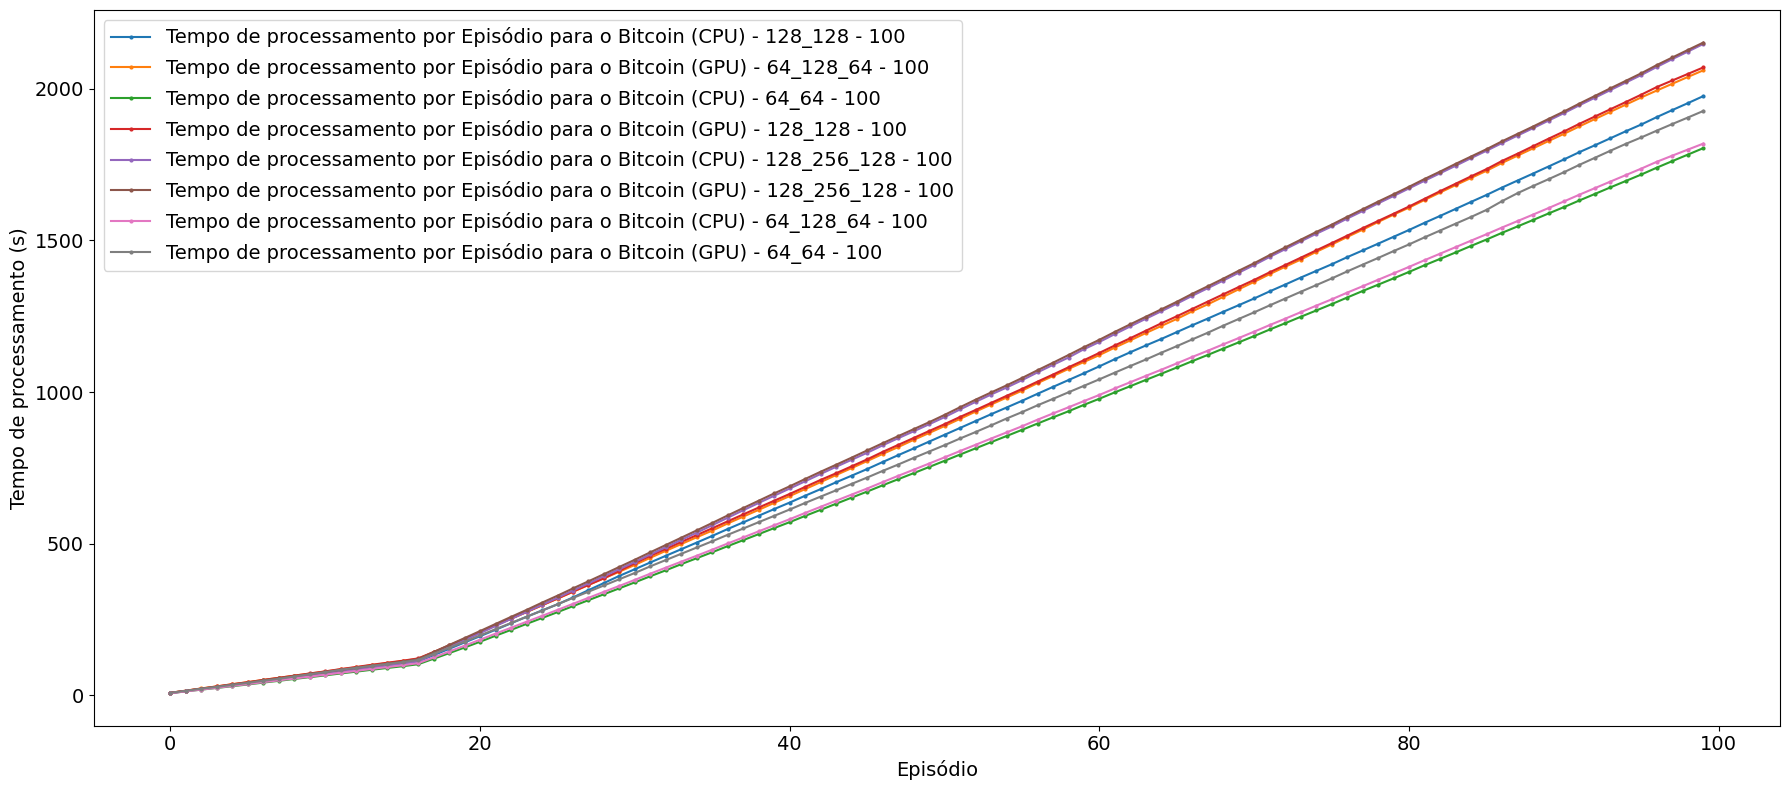

In [9]:
def plot_data_agg(directories_dict_list, axis, axis_label='', should_save_image=False):
    def get_network_architecture(input_text):
        input = re.search(r'input: (\d+)', input_text).group(1)

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')
        hidden_layers = ", ".join(map(str, hidden_layers[:-1])) + " e " + str(hidden_layers[-1])

        output = re.search(r'output: \[(.*?)\]', input_text).group(1)
        output = len([int(numero) for numero in output.split()])

        output_text = f'*A rede neural do Agente DDQ-L possui {input} neurônios de entrada, com {hidden_layers} neuronios nas camadas ocultas e {output} neurônios de saída'

        return output_text
    
    def get_file_name(title, input_text,length, type='file'):

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')

        if type == 'file':
            return f"{title} - {'_'.join(hidden_layers)} - {length}"
        elif type == 'image':
            return f"{title} - {'_'.join(hidden_layers)} - {length}".replace(" ", "_")
    
    def translate_fn(key, type='title'):
        translate_dict = {
            'Step': 'Episódio',
            'agent_returns': 'Retorno do agente',
            'average_net_worth': {'title': 'Patrimônio líquido médio', 'label': 'Patrimônio líquido médio (USD)'},
            'avg_twap': 'TWAP médio',
            'diff_returns': 'Diferença de retorno', 
            'episode_orders': 'Pedidos por episódio',
            'information_ratio': 'Razão de informação',
            'market_returns': 'Retorno do mercado', 
            'rewards': 'Recompensas', 
            'time_to_process': {'title': 'Tempo de processamento', 'label': 'Tempo de processamento (s)'},
            'win_rate': 'Taxa de sucesso'
        }

        if isinstance(translate_dict.get(key), dict):
            if type == 'title':
                return translate_dict.get(key).get('title')
            elif type == 'label':
                return translate_dict.get(key).get('label')
            else:
                raise Exception('Type not found')
        elif translate_dict.get(x, None):
            return translate_dict.get(key)
        else:
            return x

    fig, ax = plt.subplots(figsize=(18, 8))

    for directories_dict in directories_dict_list:
        df = directories_dict.get('dataframe')
        if len(df) > 150:
            continue
        x, y = axis
        x_label, y_label = axis_label if isinstance(axis_label, tuple) else axis
        df = directories_dict.get('dataframe')
        label = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'} ({directories_dict.get('processing_device')})"
        subtitle = directories_dict.get("network_architecture")
        label = get_file_name(label, subtitle, len(df))
        ax.plot(df[x], df[y], marker='o', linestyle='-', markersize=2, label=label)
        
        if y == 'time_to_process':
            print(f"{label} -> {df[y].iloc[-1]:.2f} s ou {df[y].iloc[-1]/60:.2f} min")
        elif y == 'average_net_worth':
            print(f"{label} -> US$ {df[y].mean():.2f}")
        
        # if should_save_image:
        #     df.to_csv(f"./runs/data/{get_file_name(label, subtitle, len(df))}.csv", index=False)
        #     plt.savefig(f"./runs/images/{get_file_name(label, subtitle, len(df), type='image')}.png")

    ax.set_xlabel(translate_fn(x_label, 'label'), fontsize=14)
    ax.set_ylabel(translate_fn(y_label, 'label'), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14) 

    title = "Comparação de Gráficos"
    # ax.set_title(title, fontsize=22)

    ax.legend(loc='best', fontsize=14)
    plt.tight_layout()

    if should_save_image:
        plt.savefig(f"./runs/images/{get_file_name(title, '', 0, type='image')}.png")

    plt.show()


plot_data_agg(directories_dict, axis=('Step', 'time_to_process'), should_save_image=False)

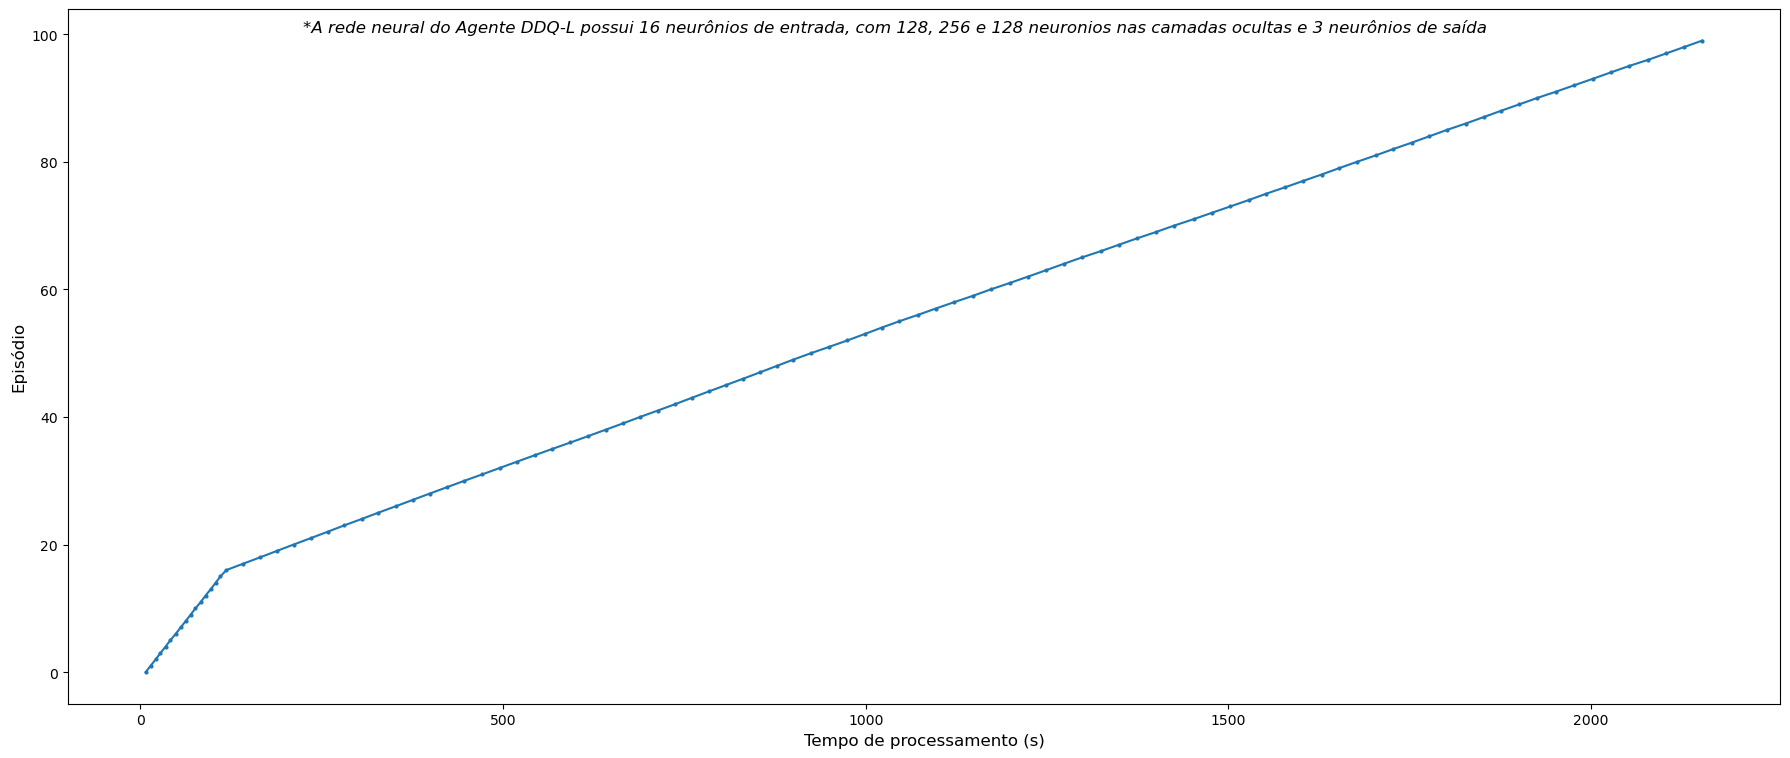

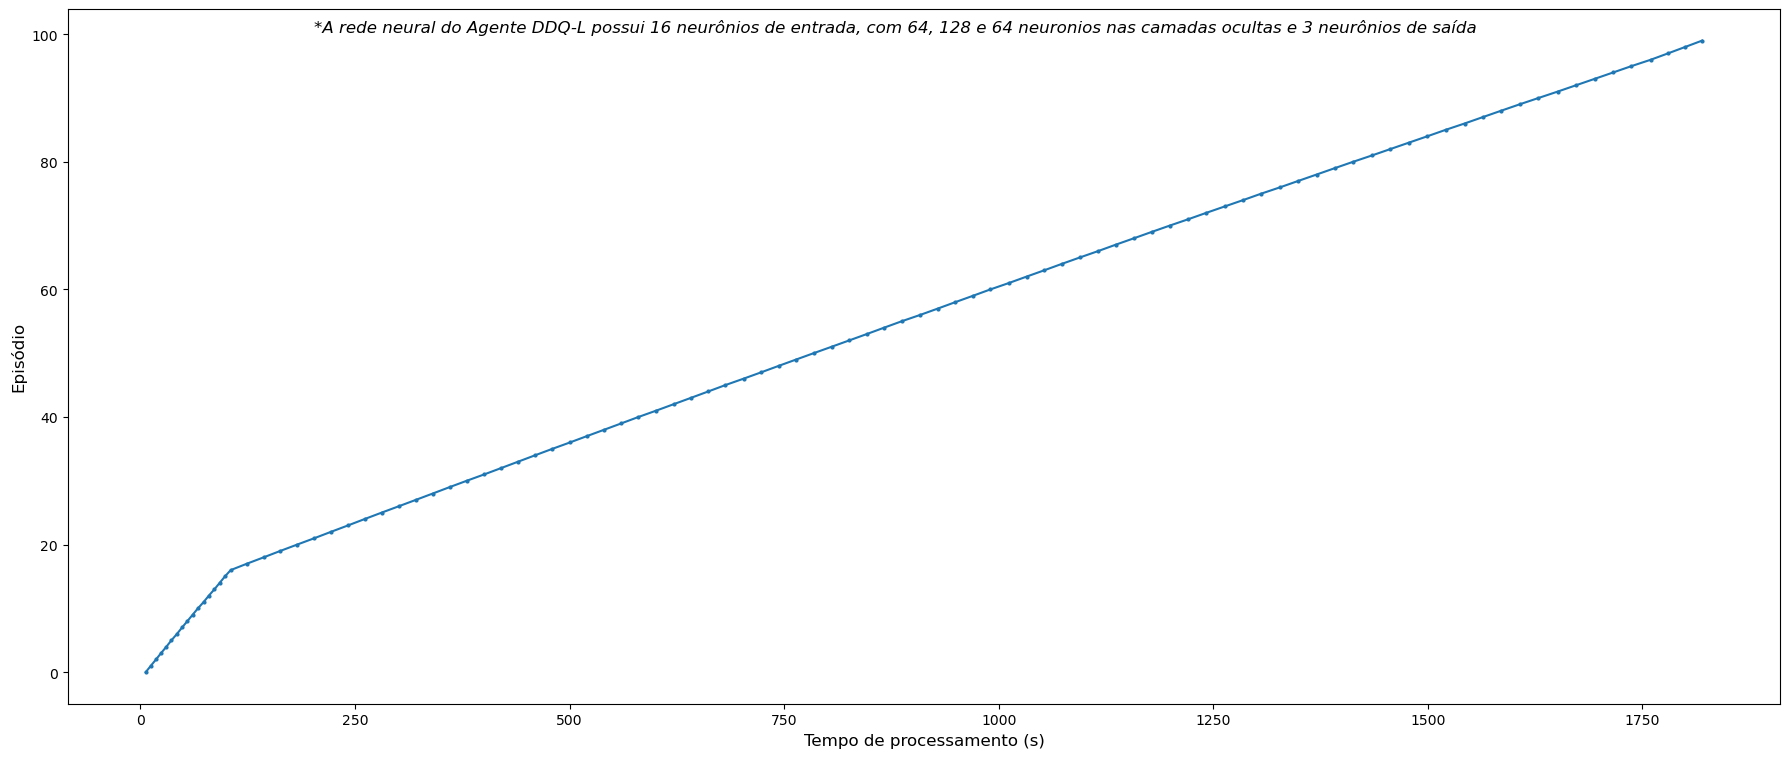

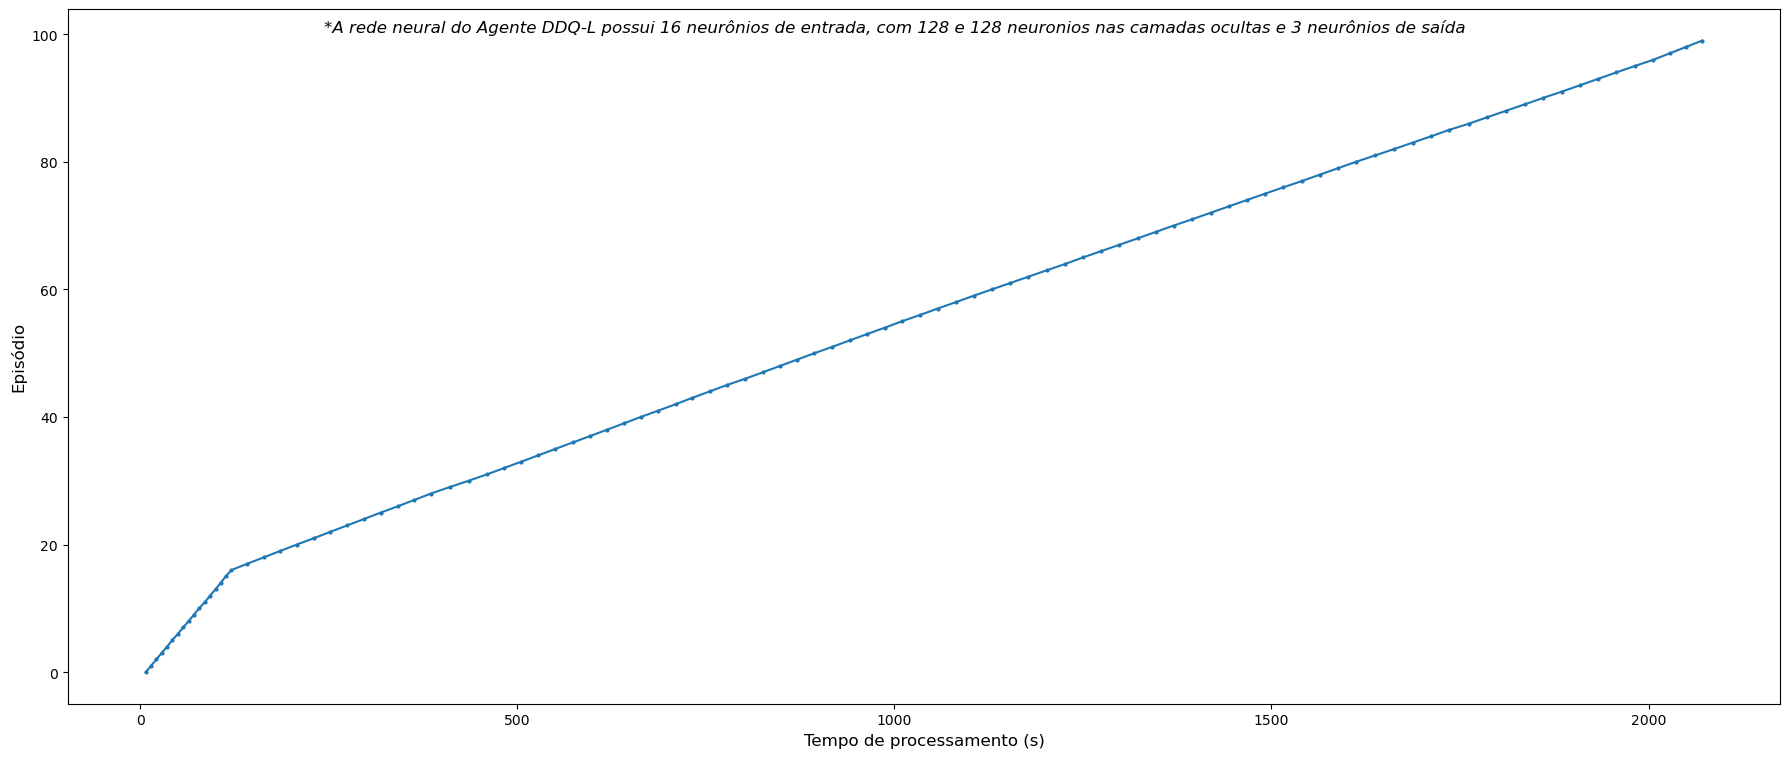

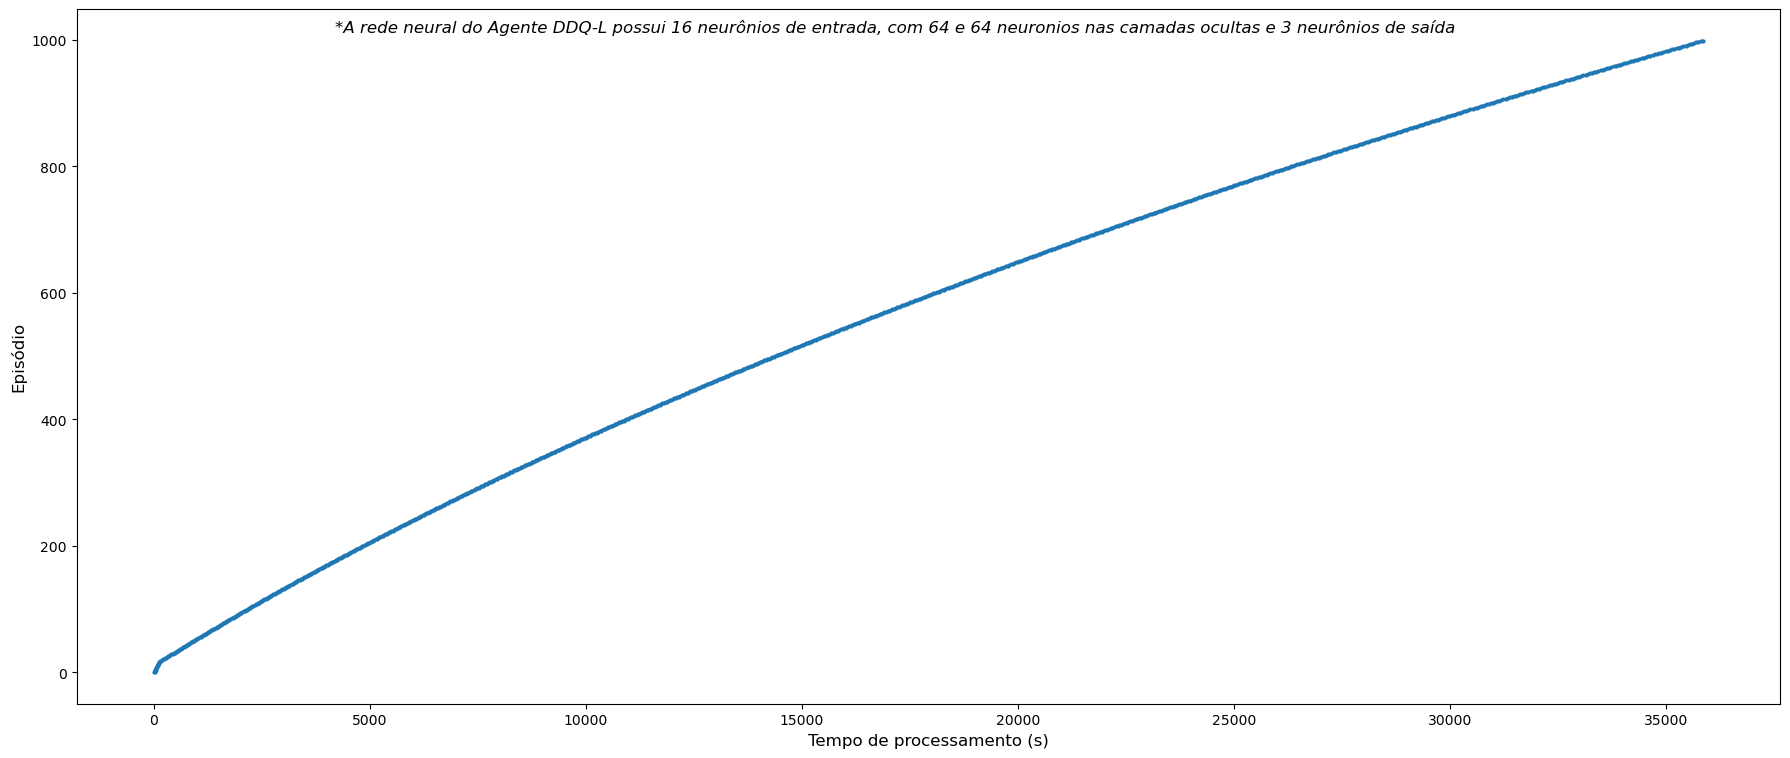

In [10]:

plot_data(directories_dict[8], axis=('time_to_process', 'Step'), title='Close') # Piores 128,256,128
plot_data(directories_dict[9], axis=('time_to_process', 'Step'), title='Close') # Piores
plot_data(directories_dict[3], axis=('time_to_process', 'Step'), title='Close') # Melhores 
plot_data(directories_dict[5], axis=('time_to_process', 'Step'), title='Close') # Melhores

Tempo de processamento por Episódio para o Bitcoin (CPU) - 100: 32.94064127604167
Tempo de processamento por Episódio para o Bitcoin (GPU) - 100: 34.36007080078125
Tempo de processamento por Episódio para o Bitcoin (CPU) - 100: 30.07968953450521
Tempo de processamento por Episódio para o Bitcoin (GPU) - 100: 34.51790771484375
Tempo de processamento por Episódio para o Bitcoin (CPU) - 100: 35.80922037760417
Tempo de processamento por Episódio para o Bitcoin (GPU) - 100: 35.88607991536458
Tempo de processamento por Episódio para o Bitcoin (CPU) - 100: 30.327911376953125
Tempo de processamento por Episódio para o Bitcoin (GPU) - 100: 32.12353515625


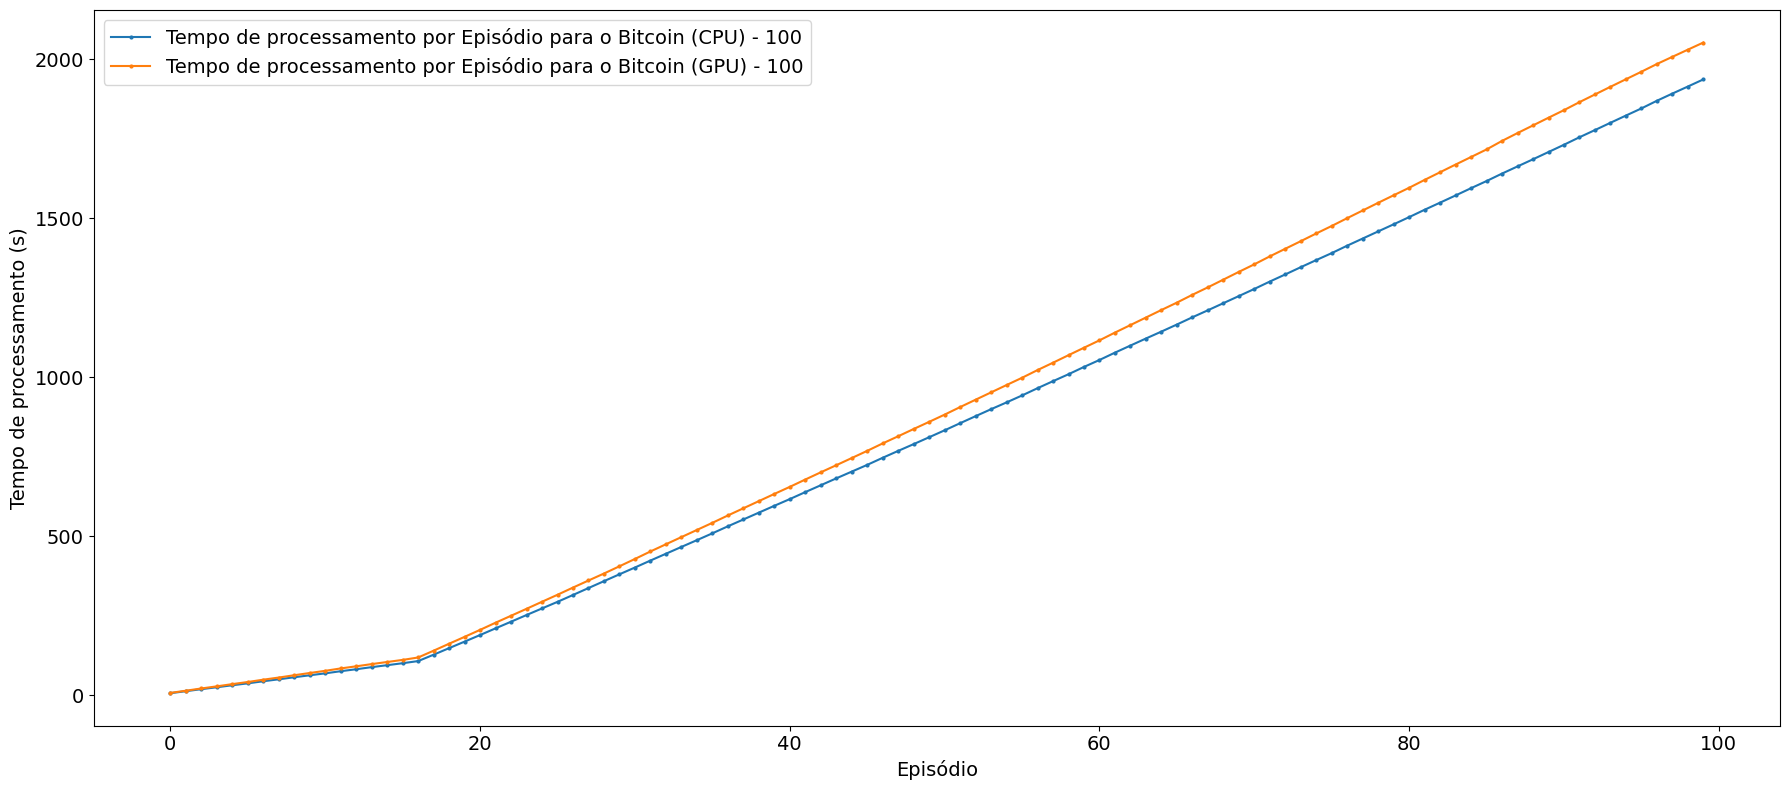

In [11]:
def plot_data_avg(directories_dict_list, axis, axis_label='', should_save_image=False):
    def get_network_architecture(input_text):
        input = re.search(r'input: (\d+)', input_text).group(1)

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')
        hidden_layers = ", ".join(map(str, hidden_layers[:-1])) + " e " + str(hidden_layers[-1])

        output = re.search(r'output: \[(.*?)\]', input_text).group(1)
        output = len([int(numero) for numero in output.split()])

        output_text = f'*A rede neural do Agente DDQ-L possui {input} neurônios de entrada, com {hidden_layers} neuronios nas camadas ocultas e {output} neurônios de saída'

        return output_text
    
    def get_file_name(title, input_text,length, type='file'):

        if input_text != '':
            hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
            hidden_layers = hidden_layers.split(', ')
        else: 
            hidden_layers = None

        if hidden_layers:
            if type == 'file':
                return f"{title} - {'_'.join(hidden_layers)} - {length}"
            elif type == 'image':
                return f"{title} - {'_'.join(hidden_layers)} - {length}".replace(" ", "_")
        else:
            if type == 'file':
                return f"{title} - {length}"
            elif type == 'image':
                return f"{title} - {length}".replace(" ", "_")
        
    def translate_fn(key, type='title'):
        translate_dict = {
            'Step': 'Episódio',
            'agent_returns': 'Retorno do agente',
            'average_net_worth': {'title': 'Patrimônio líquido médio', 'label': 'Patrimônio líquido médio (USD)'},
            'avg_twap': 'TWAP médio',
            'diff_returns': 'Diferença de retorno', 
            'episode_orders': 'Pedidos por episódio',
            'information_ratio': 'Razão de informação',
            'market_returns': 'Retorno do mercado', 
            'rewards': 'Recompensas', 
            'time_to_process': {'title': 'Tempo de processamento', 'label': 'Tempo de processamento (s)'},
            'win_rate': 'Taxa de sucesso'
        }

        if isinstance(translate_dict.get(key), dict):
            if type == 'title':
                return translate_dict.get(key).get('title')
            elif type == 'label':
                return translate_dict.get(key).get('label')
            else:
                raise Exception('Type not found')
        elif translate_dict.get(x, None):
            return translate_dict.get(key)
        else:
            return x

    fig, ax = plt.subplots(figsize=(18, 8))

    df_cpu = []
    df_gpu = []
    for directories_dict in directories_dict_list:
        df = directories_dict.get('dataframe')
        if len(df) > 150:
            continue
        x, y = axis
        x_label, y_label = axis_label if isinstance(axis_label, tuple) else axis
        df = directories_dict.get('dataframe')
        if directories_dict.get('processing_device') == 'CPU':
            df_cpu.append(df)
            label_cpu = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'} ({directories_dict.get('processing_device')})"
            label_cpu = get_file_name(label_cpu, "", len(df))
            if y == 'time_to_process':
                print(f"{label_cpu}: {df[y].iloc[-1]/60}")
            elif y == 'average_net_worth':
                print(f"{label_cpu}: {df[y].iloc[-1]}")
        else:
            df_gpu.append(df)
            label_gpu = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'} ({directories_dict.get('processing_device')})"
            label_gpu = get_file_name(label_gpu, "", len(df))
            if y == 'time_to_process':
                print(f"{label_gpu}: {df[y].iloc[-1]/60}")
            elif y == 'average_net_worth':
                print(f"{label_gpu}: {df[y].iloc[-1]}")
    # Average CPU
    df_avg_cpu = pd.concat(df_cpu).groupby(x).mean().reset_index()
    df_avg_gpu = pd.concat(df_gpu).groupby(x).mean().reset_index()


    # subtitle = directories_dict.get("network_architecture")
    ax.plot(df_avg_cpu[x], df_avg_cpu[y], marker='o', linestyle='-', markersize=2, label=label_cpu)
    ax.plot(df_avg_gpu[x], df_avg_gpu[y], marker='o', linestyle='-', markersize=2, label=label_gpu)
    ax.set_xlabel(translate_fn(x_label, 'label'), fontsize=14)
    ax.set_ylabel(translate_fn(y_label, 'label'), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14) 

    title = "Comparação de Gráficos"
    # ax.set_title(title, fontsize=22)

    ax.legend(loc='best', fontsize=14)
    plt.tight_layout()

    if should_save_image:
        plt.savefig(f"./runs/images/{get_file_name(title, '', 0, type='image')}.png")

    plt.show()


plot_data_avg(directories_dict, axis=('Step', 'time_to_process'), should_save_image=False)

Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 100: 1007.4725952148438
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 100: 1013.0533447265624
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 100: 1016.4280395507812
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 100: 1013.9293212890624
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 100: 1016.9432373046876
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 100: 1026.6507568359375
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 100: 1004.5258178710938
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 100: 1023.3186645507812


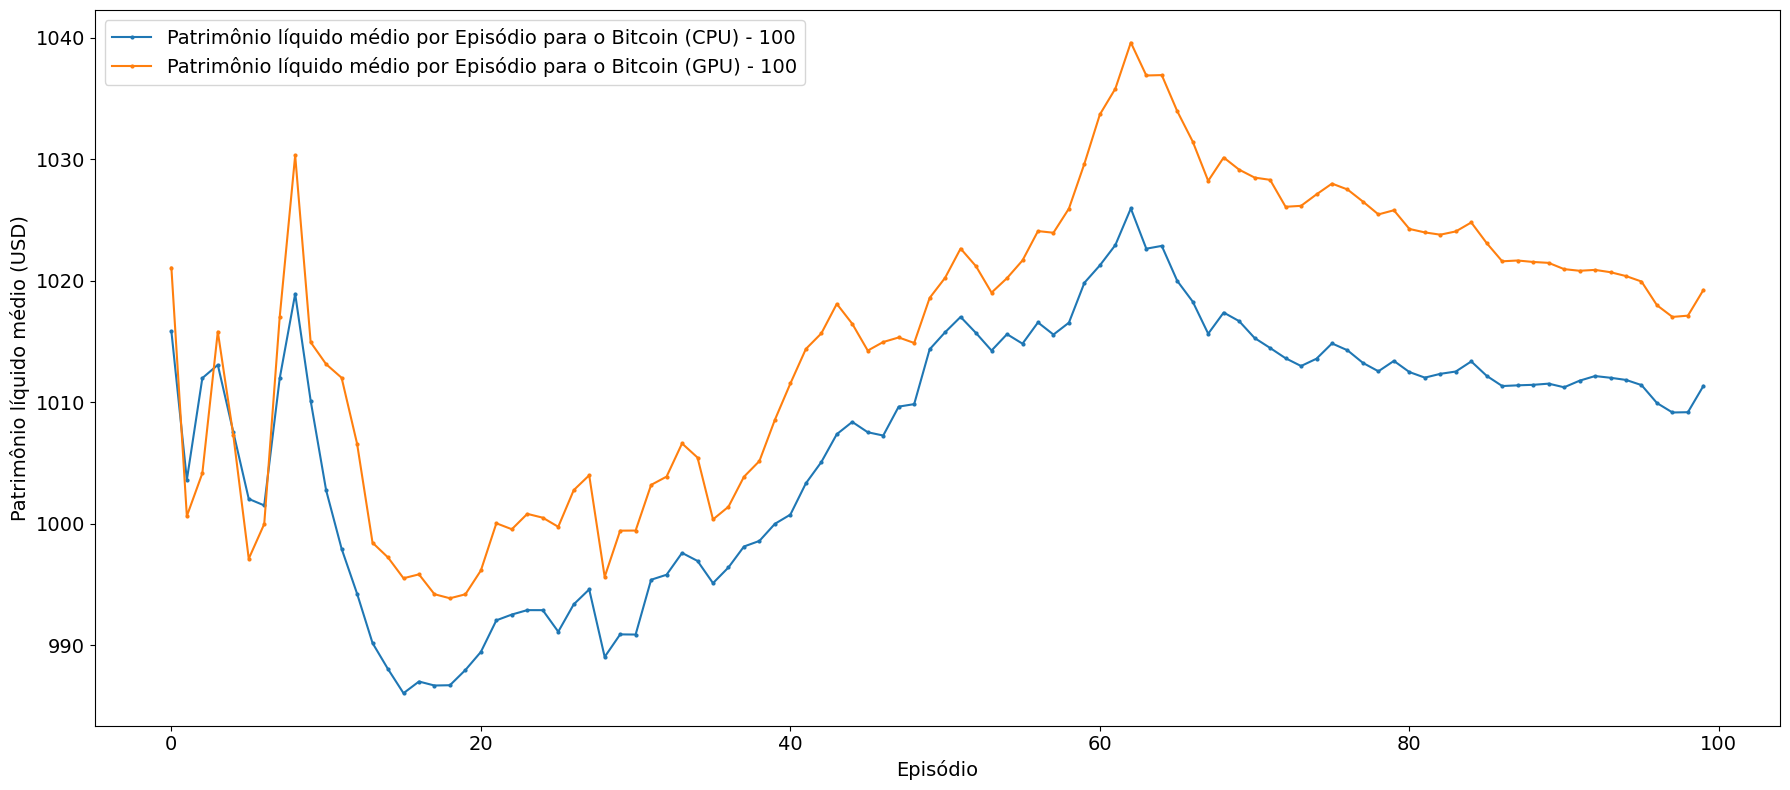

In [12]:

plot_data_avg(directories_dict, axis=('Step', 'average_net_worth'), should_save_image=False)

Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 128_128 - 100 -> US$ 1012.12
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 64_128_64 - 100 -> US$ 990.67
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 64_64 - 100 -> US$ 1023.95
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 128_128 - 100 -> US$ 1019.28
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 128_256_128 - 100 -> US$ 1009.71
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 128_256_128 - 100 -> US$ 1027.04
Patrimônio líquido médio por Episódio para o Bitcoin (CPU) - 64_128_64 - 100 -> US$ 982.03
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 64_64 - 100 -> US$ 1025.36


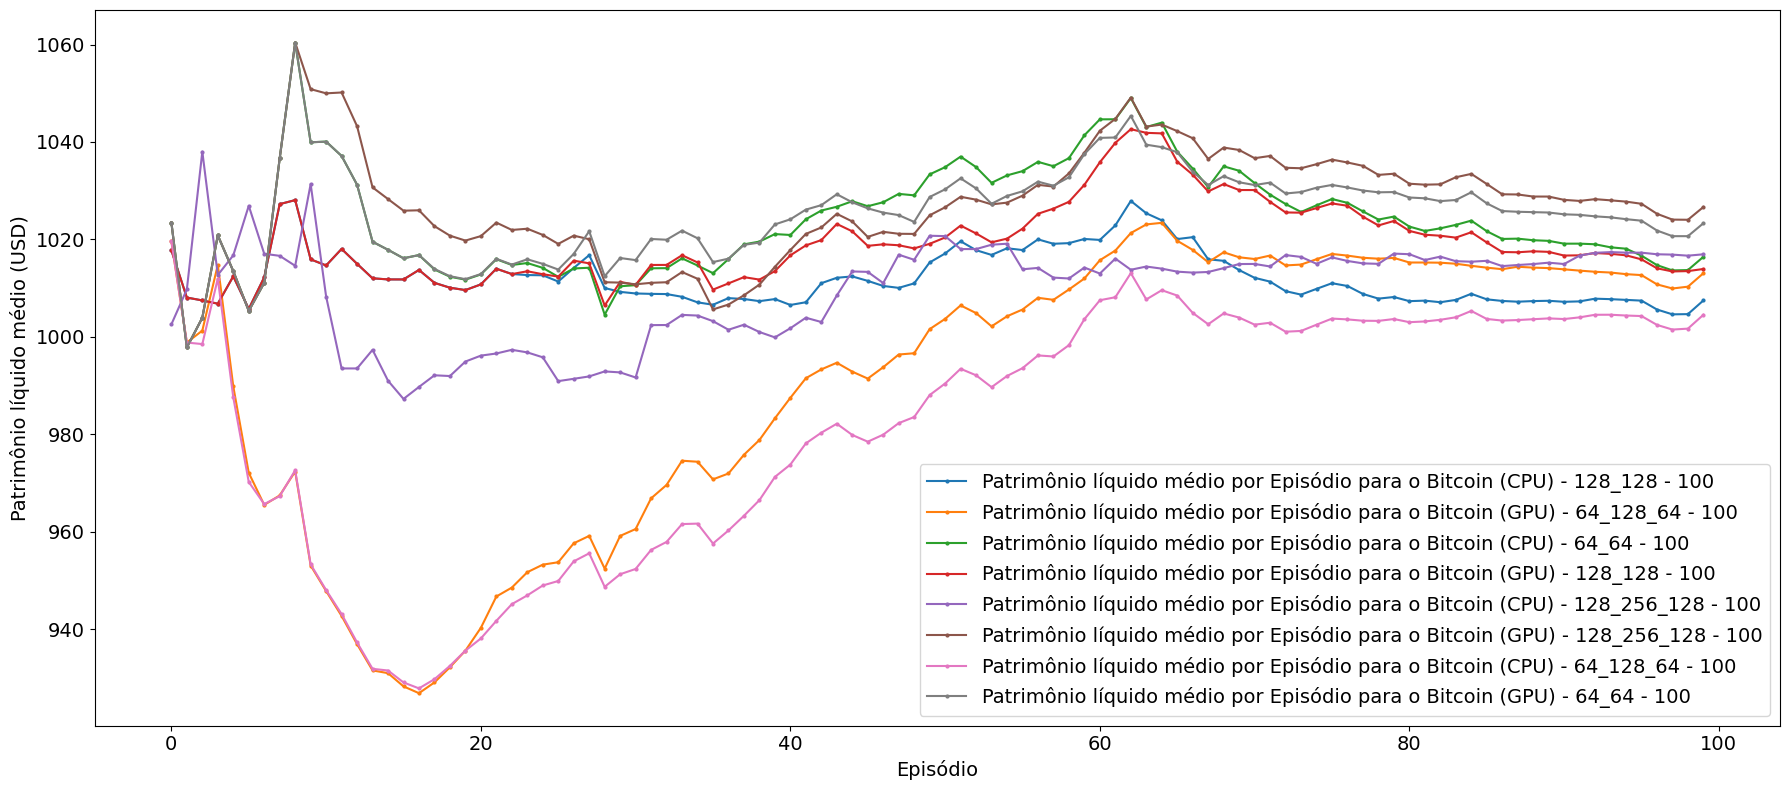

In [13]:
plot_data_agg(directories_dict, axis=('Step', 'average_net_worth'), should_save_image=False)

In [14]:
import numpy as np

Tempo de processamento por Episódio para o Bitcoin (GPU) - 64_64 - 1000 -> 35582.73 s ou 593.05 min
Tempo de processamento por Episódio para o Ethereum (GPU) - 64_64 - 1000 -> 35836.92 s ou 597.28 min
Tempo de processamento por Episódio para o Bitcoin (GPU) - 128_256_128 - 1000 -> 36084.32 s ou 601.41 min
Tempo de processamento por Episódio para o Ethereum (GPU) - 128_256_128 - 1000 -> 35580.65 s ou 593.01 min


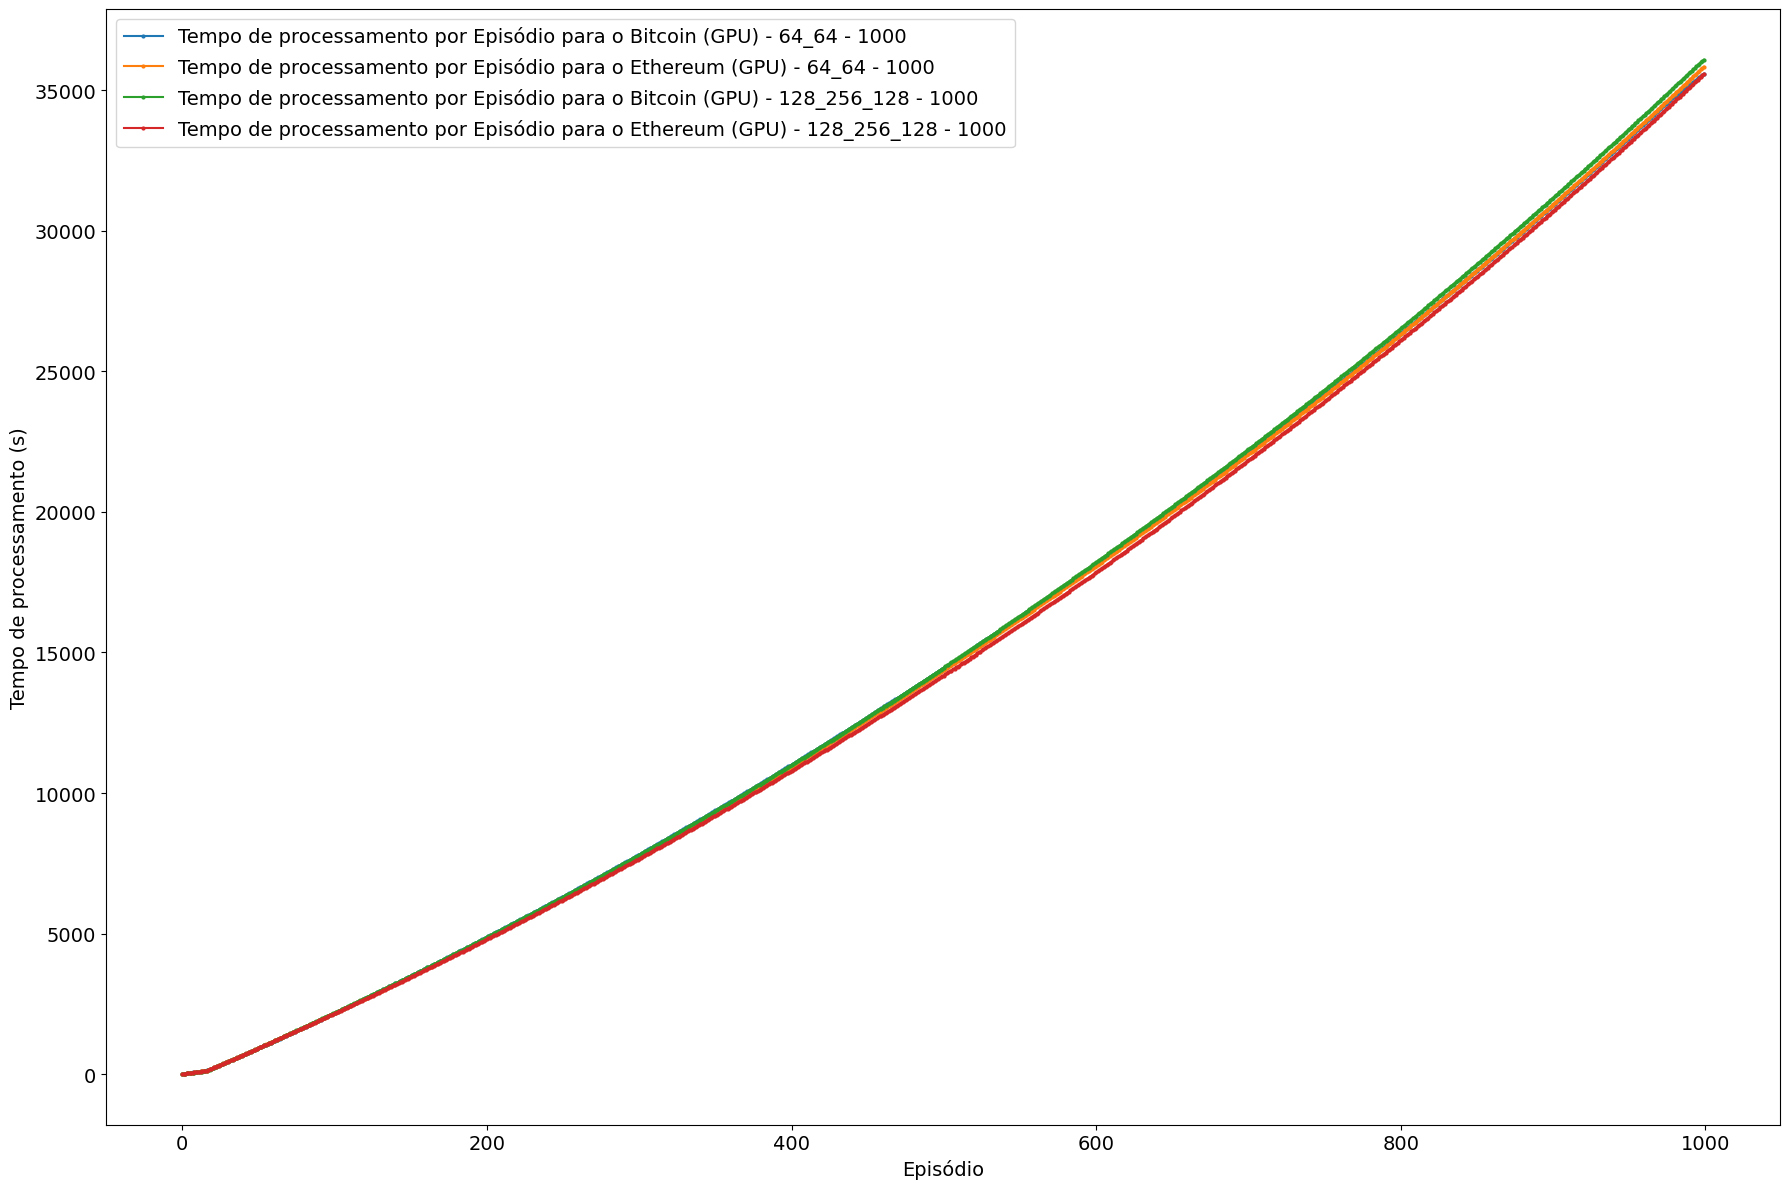

In [17]:
def plot_data_agg(directories_dict_list, axis, axis_label='', should_save_image=False):
    def get_network_architecture(input_text):
        input = re.search(r'input: (\d+)', input_text).group(1)

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')
        hidden_layers = ", ".join(map(str, hidden_layers[:-1])) + " e " + str(hidden_layers[-1])

        output = re.search(r'output: \[(.*?)\]', input_text).group(1)
        output = len([int(numero) for numero in output.split()])

        output_text = f'*A rede neural do Agente DDQ-L possui {input} neurônios de entrada, com {hidden_layers} neuronios nas camadas ocultas e {output} neurônios de saída'

        return output_text
    
    def get_file_name(title, input_text,length, type='file'):

        hidden_layers = re.search(r'internals: \((.*?)\)', input_text).group(1)
        hidden_layers = hidden_layers.split(', ')

        if type == 'file':
            return f"{title} - {'_'.join(hidden_layers)} - {length}"
        elif type == 'image':
            return f"{title} - {'_'.join(hidden_layers)} - {length}".replace(" ", "_")
    
    def translate_fn(key, type='title'):
        translate_dict = {
            'Step': 'Episódio',
            'agent_returns': 'Retorno do agente',
            'average_net_worth': {'title': 'Patrimônio líquido médio', 'label': 'Patrimônio líquido médio (USD)'},
            'avg_twap': 'TWAP médio',
            'diff_returns': 'Diferença de retorno', 
            'episode_orders': 'Pedidos por episódio',
            'information_ratio': 'Razão de informação',
            'market_returns': 'Retorno do mercado', 
            'rewards': 'Recompensas', 
            'time_to_process': {'title': 'Tempo de processamento', 'label': 'Tempo de processamento (s)'},
            'win_rate': 'Taxa de sucesso'
        }

        if isinstance(translate_dict.get(key), dict):
            if type == 'title':
                return translate_dict.get(key).get('title')
            elif type == 'label':
                return translate_dict.get(key).get('label')
            else:
                raise Exception('Type not found')
        elif translate_dict.get(x, None):
            return translate_dict.get(key)
        else:
            return x

    fig, ax = plt.subplots(figsize=(18, 12))

    for directories_dict in directories_dict_list:
        df = directories_dict.get('dataframe')
        if len(df) < 150:
            continue
        x, y = axis
        x_label, y_label = axis_label if isinstance(axis_label, tuple) else axis
        df = directories_dict.get('dataframe')
        label = f"{translate_fn(y_label, 'title')} por {translate_fn(x_label, 'title')} para o {'Bitcoin' if directories_dict.get('stock_name') == 'BTCUSD_1h' else 'Ethereum'} ({directories_dict.get('processing_device')})"
        subtitle = directories_dict.get("network_architecture")
        label = get_file_name(label, subtitle, len(df))
        ax.plot(df[x], df[y], marker='o', linestyle='-', markersize=2, label=label)
        
        if y == 'time_to_process':
            print(f"{label} -> {df[y].iloc[-1]:.2f} s ou {df[y].iloc[-1]/60:.2f} min")
        elif y == 'average_net_worth':
            print(f"{label} -> US$ {df[y].mean():.2f}")
        
        # if should_save_image:
        #     df.to_csv(f"./runs/data/{get_file_name(label, subtitle, len(df))}.csv", index=False)
        #     plt.savefig(f"./runs/images/{get_file_name(label, subtitle, len(df), type='image')}.png")

    ax.set_xlabel(translate_fn(x_label, 'label'), fontsize=14)
    ax.set_ylabel(translate_fn(y_label, 'label'), fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=14) 

    title = "Comparação de Gráficos"
    # ax.set_title(title, fontsize=22)

    ax.legend(loc='best', fontsize=14)
    plt.tight_layout()

    if should_save_image:
        plt.savefig(f"./runs/images/{get_file_name(title, '', 0, type='image')}.png")

    plt.show()


plot_data_agg(directories_dict, axis=('Step', 'time_to_process'), should_save_image=False)

Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 64_64 - 1000 -> US$ 1022.60
Patrimônio líquido médio por Episódio para o Ethereum (GPU) - 64_64 - 1000 -> US$ 1018.12
Patrimônio líquido médio por Episódio para o Bitcoin (GPU) - 128_256_128 - 1000 -> US$ 1022.10
Patrimônio líquido médio por Episódio para o Ethereum (GPU) - 128_256_128 - 1000 -> US$ 1017.06


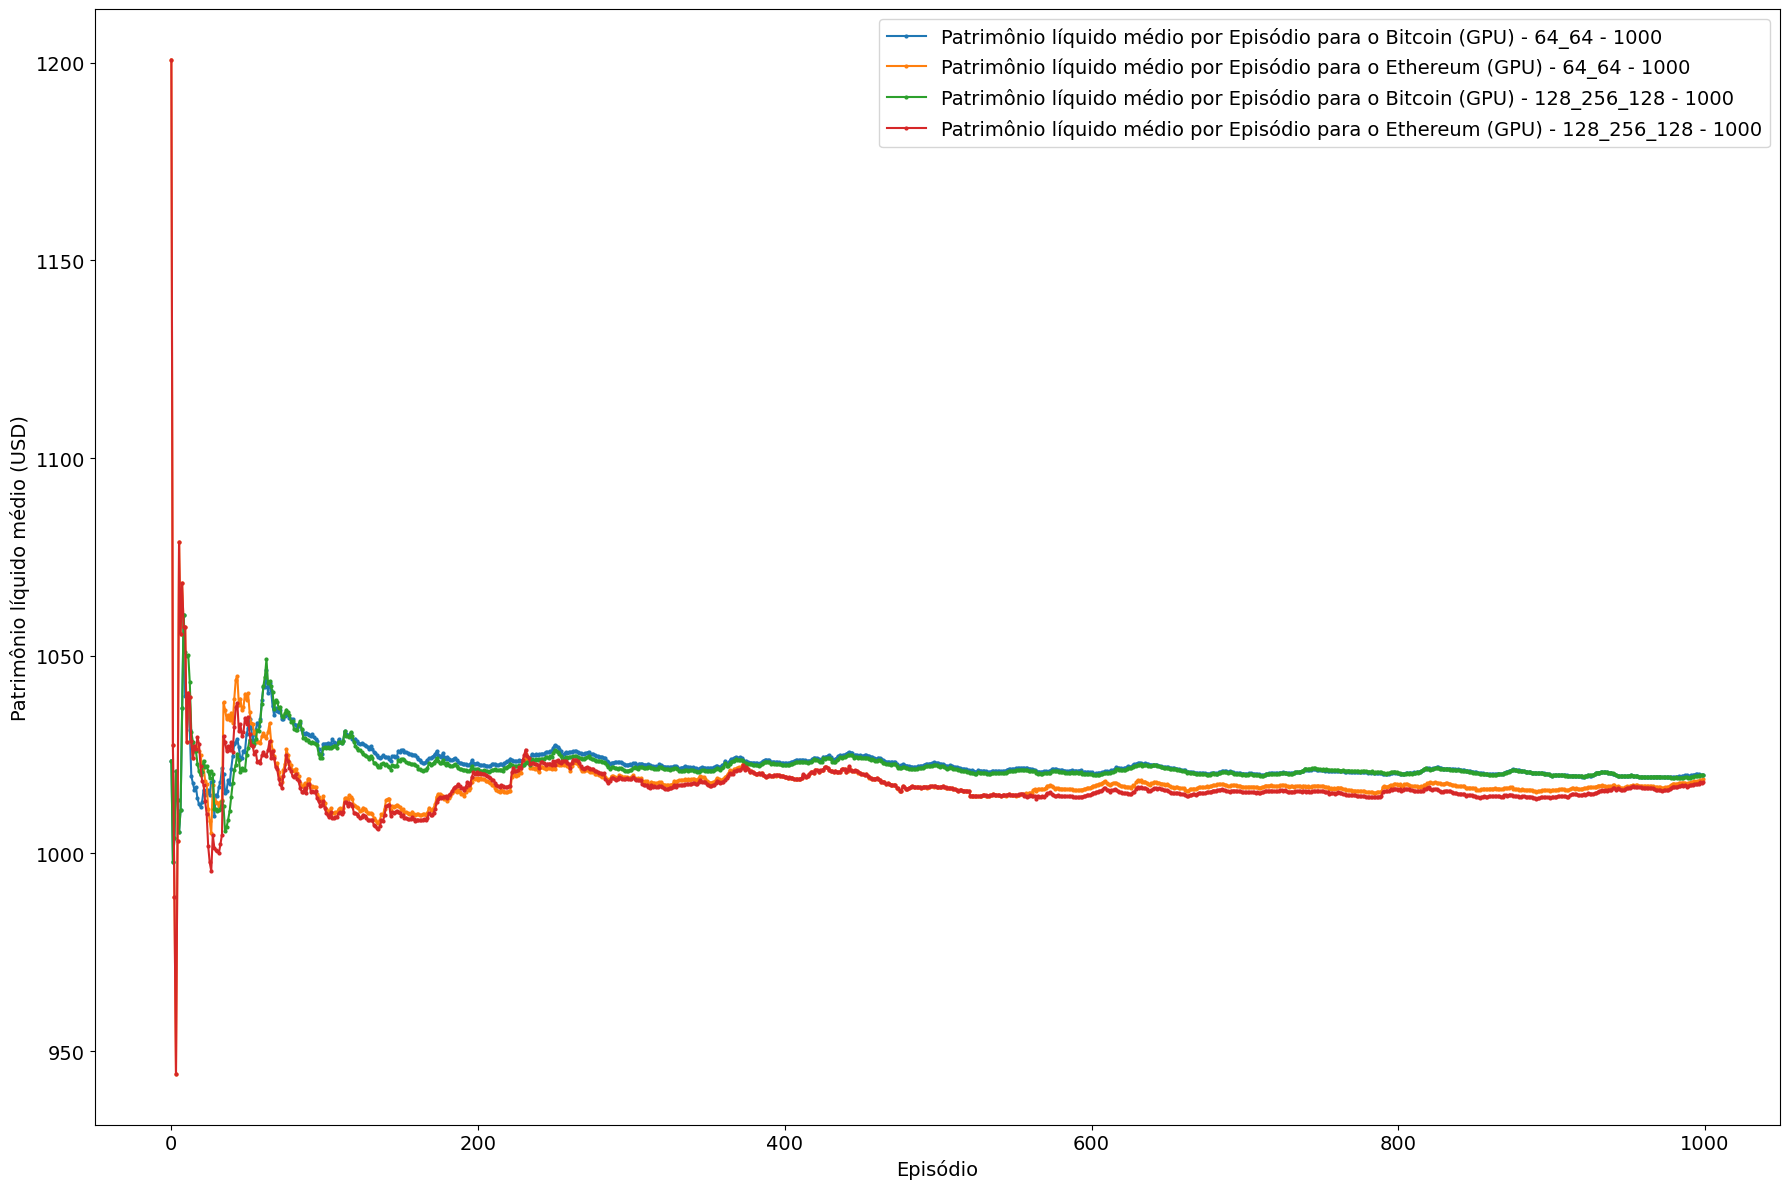

In [19]:
plot_data_agg(directories_dict, axis=('Step', 'average_net_worth'), should_save_image=False)